Notebook by Patience Lamb

Patience.Lamb@inl.gov

# **What is Machine Learning?**


Machine learning is a type of artificial intelligence which focuses on the use of algorithms and data to imitate human learning in order to make predictions or decisions without direct intrusion.

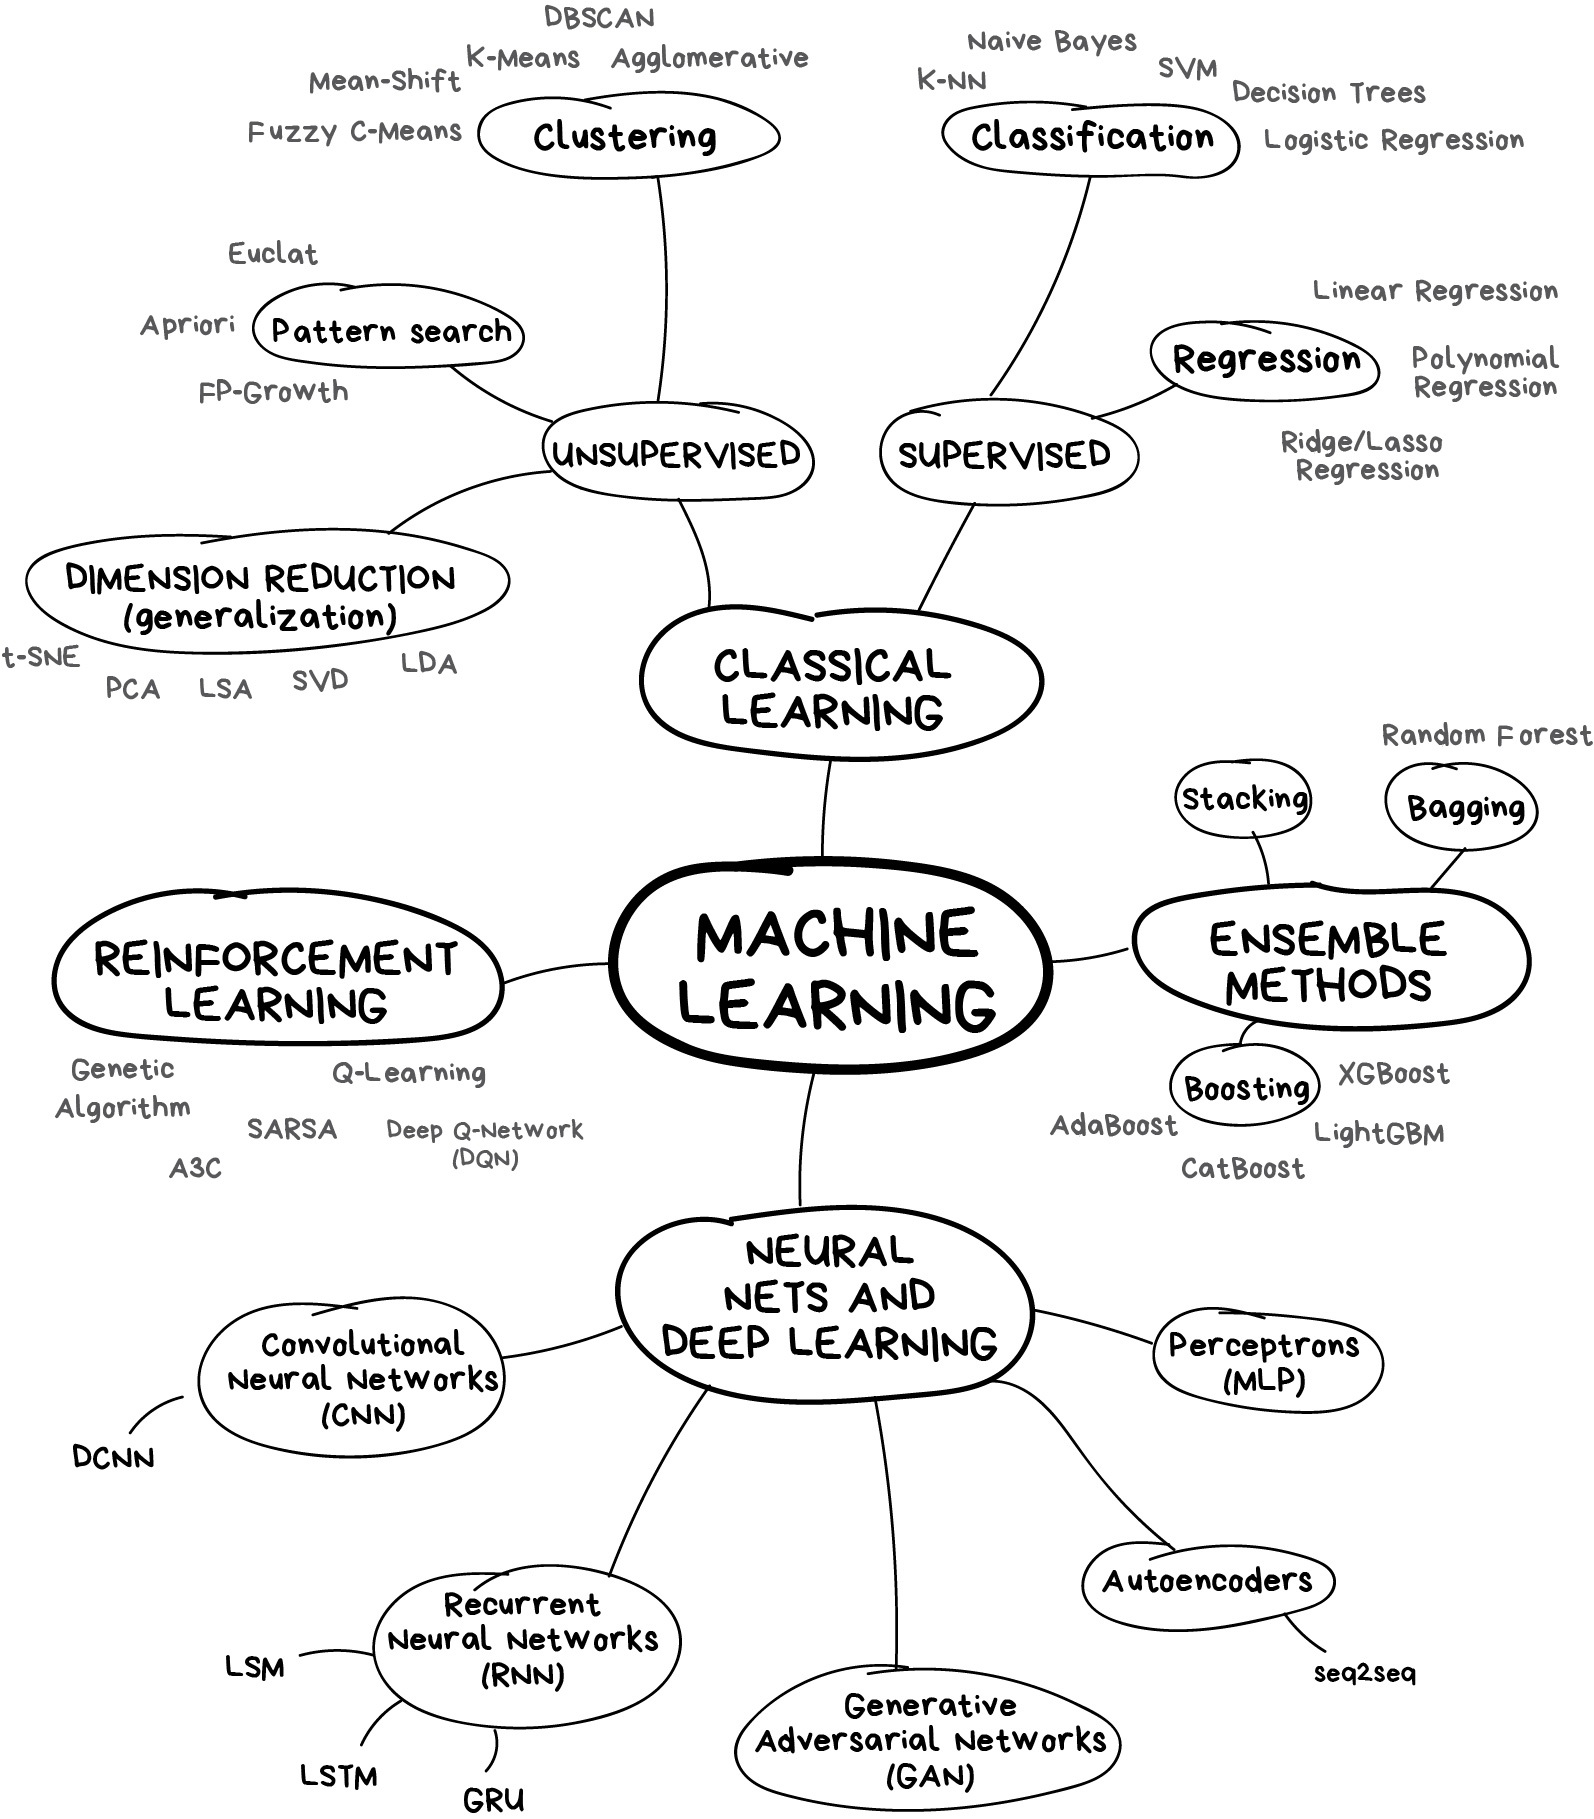
Source: https://vas3k.com/blog/machine_learning/

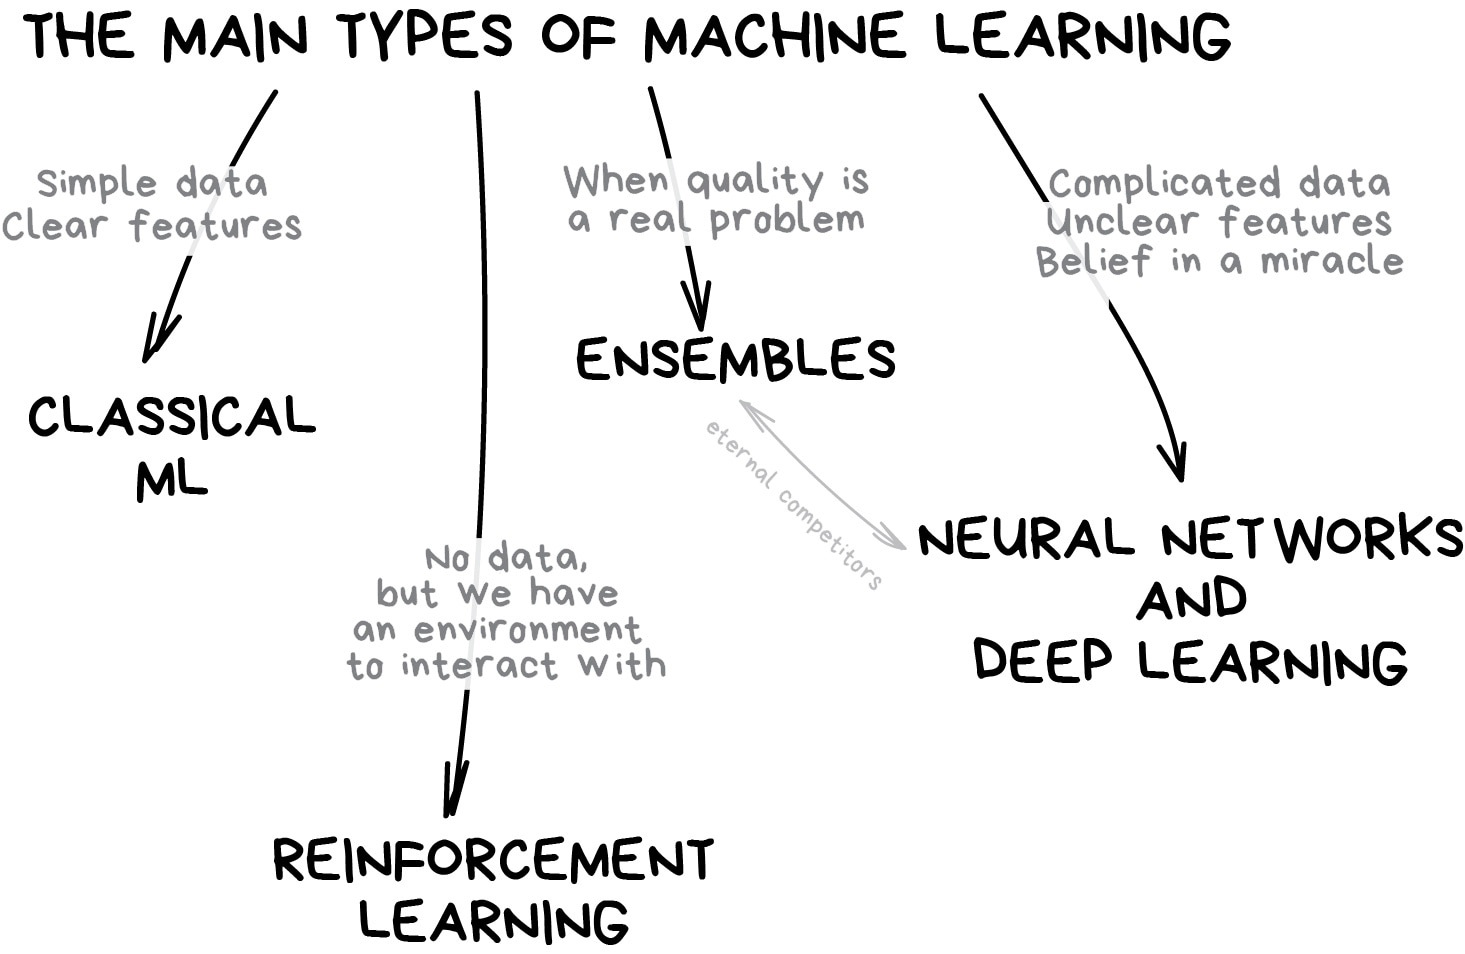
Source: https://vas3k.com/blog/machine_learning/

# **Classical Machine Learning**

Classical machine learning can be broken down into two cateogories: supervised and unsupervised. In supervised learning, the target values are known. In unsupervised machine learning, the data is not labeled in any sort of way. In general, supervised machine learning is more commonly implemented than unsupervised machine learning. Below shows an example of a dataset used for supervised learning versus unsupervised learning. 

In example 1, we can use the child's height as the target and we can build a model to predict the height for any child given their parent's heights. With the MNIST digits, we do not know what the target is as we are given an image of a handwritten digit but we do not know without human intervention what the digit is.

In [ ]:
# Supervised learning target: Galton Heights Dataset
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

heights = pd.read_csv('https://gitlab.com/lambpati/cs4499/-/raw/main/galtonheights')
heights.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


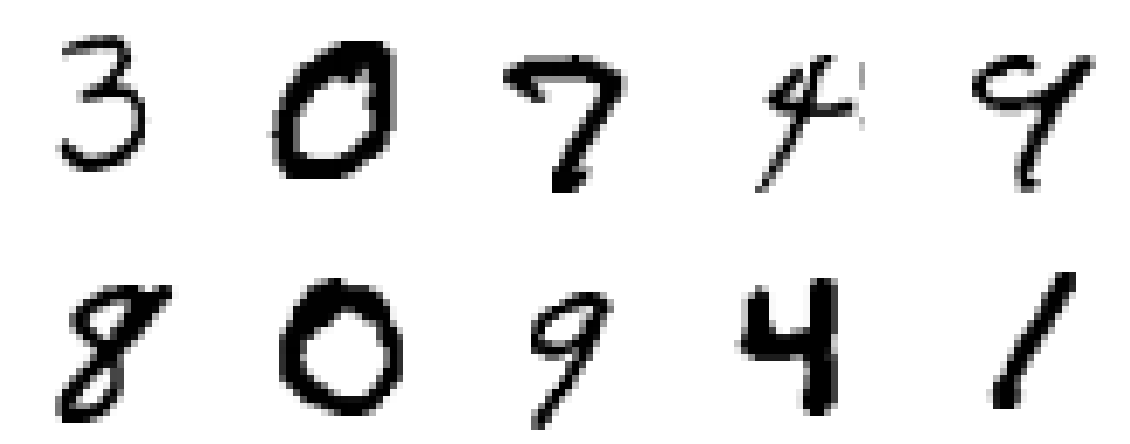

In [ ]:
# Unsupervised learning target: MNIST Digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784',version=1)
# Ignore that y is a target for now. This will be used later
# We will only use the first 200 digits.
X, y = mnist['data'].values[:200], mnist['target'].values[:200]


plt.figure(figsize=(20,8))
for index in range(10):
  plt.subplot(2,5,index+1)
  plt.imshow(X[index+50].reshape(28,28), cmap='binary')
  plt.axis('off')

plt.show()

## **Supervised Learning**

Supervised machine learning methods require the data to be split up into a training and testing set: one to train the model to fit the data, and the other to validate the effectiveness of the fit, respectively. Below, we split the Galton Height Dataset. A general rule of thumb is the ratio of training data to testing data should be 5:1. For reproducibility since SKLearn's train_test_split method splits the dataset randomly, the random_state will be set to 42.

In [ ]:
from sklearn.model_selection import train_test_split

# Removing "noise"
#heights = heights.drop('family', axis=1)
#heights = heights.drop('midparentHeight', axis=1)

# Changing gender into dummies
heights = pd.get_dummies(heights)

# Splitting Galton Height Dataframe into data and target
height_factors = heights.drop('childHeight', axis=1)
height_target = heights['childHeight']

Xtrain, Xtest, ytrain, ytest = train_test_split(height_factors, height_target, test_size=1/5, random_state=42)
Xtrain.head()

,father,mother,midparentHeight,children,childNum,family_1,family_10,family_100,family_101,family_102,family_103,family_104,family_105,family_106,family_107,family_108,family_109,family_11,family_110,family_111,family_112,family_113,family_114,family_115,family_116,family_117,family_118,family_119,family_12,family_120,family_121,family_122,family_123,family_124,family_125,family_126,family_127,family_128,family_129,family_13,...,family_65,family_66,family_67,family_68,family_69,family_7,family_70,family_71,family_72,family_73,family_74,family_75,family_76,family_77,family_78,family_79,family_8,family_80,family_81,family_82,family_83,family_84,family_85,family_86,family_87,family_88,family_89,family_9,family_90,family_91,family_92,family_93,family_94,family_95,family_96,family_97,family_98,family_99,gender_female,gender_male
408,70.0,58.0,66.32,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5,75.5,66.5,73.66,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
54,73.0,65.0,71.60,9,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
275,70.0,65.0,70.10,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
858,66.0,59.0,64.86,15,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
ytrain.head()

408    66.0
5      72.5
54     68.7
275    70.5
858    57.0
Name: childHeight, dtype: float64

In [ ]:
Xtest.head()

,father,mother,children,childNum,gender_female,gender_male
321,70.0,64.0,4,4,1,0
70,72.7,69.0,8,3,0,1
209,71.0,63.0,4,3,0,1
549,69.5,61.0,5,2,0,1
711,68.0,59.0,10,5,0,1


In [ ]:
ytest.head()

321    65.5
70     72.7
209    70.0
549    69.5
711    64.0
Name: childHeight, dtype: float64

### **Regression Methods**

Regression is used when the target is a continuous, real value (numerical) such as height, stock price, or velocity. Regression methods can be used to come up with a equation describing the behavior of a numerical system.

**Linear Regression**

Here, we will use linear regression to predict the child's height from the Galton Heights Dataset. 


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(Xtrain, ytrain)

Now, we use our trained model to predict the test values.

In [ ]:
predictions = lin_reg.predict(Xtest)

We can test the accuracy of our model by comparing the predicted values, predictions, to the actual values, ytest, through the RSME and comparing the testing to the training's $R^2$ values. If the training $R^2$ is greater than the testing $R^2$ then the model is overfit, if it is the opposite, the model is underfit. A model should be minorly overfit or perfectly fit.

In [ ]:
from sklearn.metrics import mean_squared_error
print("RMSE: ")
print(mean_squared_error(ytest,predictions,squared=False))
print("Testing data R^2: ")
print(lin_reg.score(Xtest,ytest))
print("Training data R^2: ")
print(lin_reg.score(Xtrain,ytrain))

RMSE: 
358766375081.65094
Testing data R^2: 
-1.0802812930934367e+22
Training data R^2: 
0.8587195465536591


After ensuring the validity of our model, we can output the model's equation

In [ ]:
equation = 'childHeight = '

for i in np.arange(lin_reg.coef_.size):
    equation += f'{lin_reg.coef_[i]:.4f}*{height_factors.columns[i]} + '

equation += f'{lin_reg.intercept_:.4f}'
equation

'childHeight = 0.4000*father + 0.2829*mother + 0.2683*children + -0.6460*childNum + -1.8015*gender_female + 1.8015*gender_male + 21.5363'

**Polynomial Regression**

Here, we will use polynomial regression to predict the child's height from the Galton Height Dataset. In Scikit-Learn, polynomial regression is done by PolynomialFeatures which is fed into a linear regression model. We will use the previous training testing split to compare the results. NOTE: .score does not work on polynomial features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Make polynomial features
poly = PolynomialFeatures(degree=4).fit_transform(height_factors)

Xtrain, Xtest, ytrain, ytest = train_test_split(height_factors, height_target, test_size=1/5, random_state=42)

# Fit to linear regression
poly_reg_model = LinearRegression()
poly_reg_model.fit(Xtrain, ytrain)

# Predict again
poly_pred = poly_reg_model.predict(Xtest)

In [ ]:
print("RMSE: ")
print(mean_squared_error(ytest,poly_pred,squared=False))

RMSE: 
1.9148272856613393


**Ridge/Lasso Regression**

Ridge regression shrinks coefficients to help reduce model and collinearity of a linear regression through $l^2$ regularization.

Lasso regression shrinks coefficients through $l^1$ regularization.

(See [here](https://medium.com/@davidsotunbo/ridge-and-lasso-regression-an-illustration-and-explanation-using-sklearn-in-python-4853cd543898) for more details on the math behind ridge and lasso regression)

In [ ]:
# Ridge regression
from sklearn.linear_model import Ridge

Xtrain, Xtest, ytrain, ytest = train_test_split(height_factors, height_target, test_size=1/5, random_state=42)

ridge_reg = Ridge(alpha=1.0).fit(Xtrain, ytrain)

ridge_pred = ridge_reg.predict(Xtest)

print("RMSE: ")
print(mean_squared_error(ytest,ridge_pred,squared=False))
print("Testing data R^2: ")
print(ridge_reg.score(Xtest,ytest))
print("Training data R^2: ")
print(ridge_reg.score(Xtrain,ytrain))

RMSE: 
1.9143842686443577
Testing data R^2: 
0.6924104164537117
Training data R^2: 
0.7047374006729756


In [ ]:
# Lasso regression
from sklearn.linear_model import Ridge

Xtrain, Xtest, ytrain, ytest = train_test_split(height_factors, height_target, test_size=1/5, random_state=42)

lasso_reg = Ridge(alpha=1.0).fit(Xtrain, ytrain)

lasso_pred = ridge_reg.predict(Xtest)

print("RMSE: ")
print(mean_squared_error(ytest,lasso_pred,squared=False))
print("Testing data R^2: ")
print(lasso_reg.score(Xtest,ytest))
print("Training data R^2: ")
print(lasso_reg.score(Xtrain,ytrain)) 

RMSE: 
1.9143842686443577
Testing data R^2: 
0.6924104164537117
Training data R^2: 
0.7047374006729756


### **Classification Methods**

Classification is used when the dataset can be divided into discrete categories and used in applications such as spam filtering, handwriting recognition, probabilistic risk assessment. In these examples, we will use (Supervised) MNIST digits.

**K-Nearest Neighbors**

K-Nearest Neighbords (KNN) uses 'feature similarity' to predict the values relative to how closely it matches points in the training set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5).fit(Xtrain,ytrain)
knn_pred = knn_model.predict(Xtest)

#Predicts the probability estimates for Xtest
knn_proba = knn_model.predict_proba(Xtest)

print("RMSE: ")
print(mean_squared_error(ytest,knn_pred,squared=False))
print("Testing data R^2: ")
print(knn_model.score(Xtest,ytest))
print("Training data R^2: ")
print(knn_model.score(Xtrain,ytrain)) 

RMSE: 
1.5890248582070703
Testing data R^2: 
0.75
Training data R^2: 
0.875


**Naive Bayes**

Naive Bayes is a simple probabilistic algorithm based on applying Bayes' theorem with the assumption of conditional independence between features.

In [ ]:
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5, random_state=42)

gnb_model = GaussianNB().fit(Xtrain, ytrain)
gnb_pred = gnb_model.predict(Xtest)

#Predicts the probability estimate for Xtest
gnb_proba = gnb_model.predict_proba(Xtest)

print("RMSE: ")
print(mean_squared_error(ytest,knn_pred,squared=False))
print("Testing data R^2: ")
print(gnb_model.score(Xtest,ytest))
print("Training data R^2: ")
print(gnb_model.score(Xtrain,ytrain)) 

RMSE: 
1.5890248582070703
Testing data R^2: 
0.6
Training data R^2: 
0.975


**C-Support Vector Classification**

A support vector machine (SVM) is a type of classification algorithm which separates data to find an optimal hyperplane between different categories. Scikit-Learns' LinearSVC works well on large datasets such as the full MNIST.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5, random_state=42)

svc_model = SVC(gamma='auto').fit(Xtrain, ytrain)
svc_pred = svc_model.predict(Xtest)

print("RMSE: ")
print(mean_squared_error(ytest,svc_pred,squared=False))
print(accuracy_score(ytest, svc_pred))
print("Testing data R^2: ")
print(svc_model.score(Xtest,ytest))
print("Training data R^2: ")
print(svc_model.score(Xtrain,ytrain)) 

RMSE: 
5.858754133772811
0.05
Testing data R^2: 
0.05
Training data R^2: 
1.0


**Decision Trees**

Decision trees are designed to start at the root node and work downwards to a leaf node through simple boolean expressions. Decision trees can be both used for classification and regression.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5, random_state=42)

tree_model = DecisionTreeClassifier(max_depth=5).fit(Xtrain, ytrain)
tree_pred = tree_model.predict(Xtest)

print("Accuracy Score:")
print(accuracy_score(ytest,tree_pred))

Accuracy Score:
0.475


Below is a graphical representation of our generated tree

[Text(0.6833333333333333, 0.9166666666666666, 'X[386] <= 53.0\ngini = 0.896\nsamples = 160\nvalue = [16, 18, 17, 19, 16, 10, 14, 17, 12, 21]'),
 Text(0.5, 0.75, 'X[527] <= 20.5\ngini = 0.889\nsamples = 146\nvalue = [4, 18, 16, 19, 16, 10, 13, 17, 12, 21]'),
 Text(0.43333333333333335, 0.5833333333333334, 'X[101] <= 25.0\ngini = 0.885\nsamples = 136\nvalue = [4, 18, 6, 19, 16, 10, 13, 17, 12, 21]'),
 Text(0.26666666666666666, 0.4166666666666667, 'X[402] <= 7.5\ngini = 0.874\nsamples = 124\nvalue = [4, 17, 6, 19, 16, 10, 2, 17, 12, 21]'),
 Text(0.13333333333333333, 0.25, 'X[378] <= 20.5\ngini = 0.82\nsamples = 67\nvalue = [1, 17, 5, 7, 1, 3, 0, 17, 11, 5]'),
 Text(0.06666666666666667, 0.08333333333333333, 'gini = 0.446\nsamples = 22\nvalue = [0, 0, 3, 1, 1, 1, 0, 16, 0, 0]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.762\nsamples = 45\nvalue = [1, 17, 2, 6, 0, 2, 0, 1, 11, 5]'),
 Text(0.4, 0.25, 'X[182] <= 246.0\ngini = 0.788\nsamples = 57\nvalue = [3, 0, 1, 12, 15, 7, 2, 0, 1, 16]'),
 Te

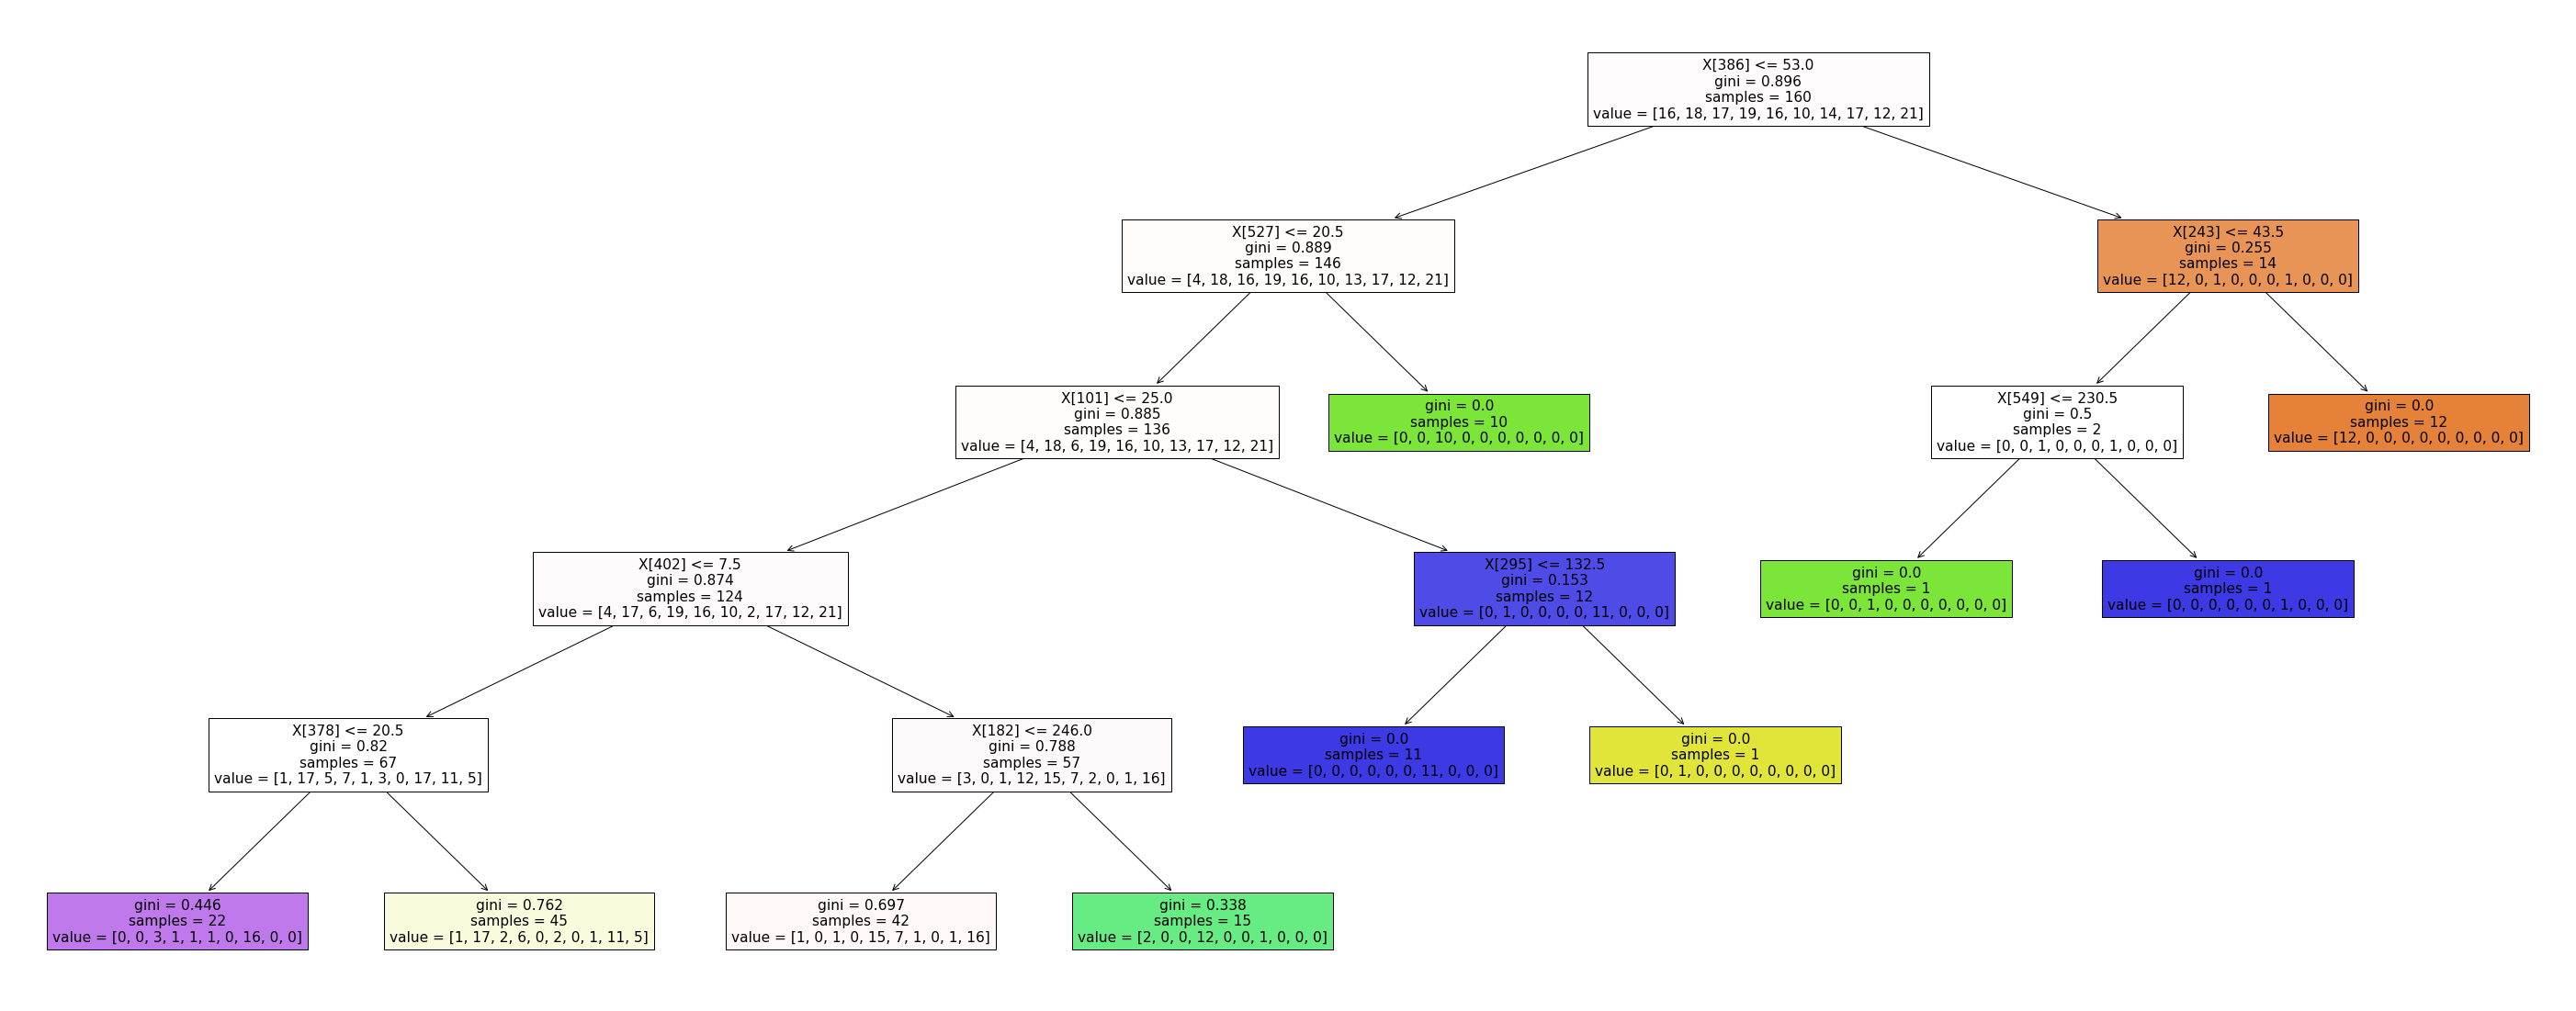

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,20))
plot_tree(tree_model,filled=True)

**Logistic Regression**

The most common type of classification is logistic regression. It is an extension of linear regression used in classification models.

In [ ]:
from sklearn.linear_model import LogisticRegression

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=1/5, random_state=42)

log_reg = LogisticRegression().fit(Xtrain, ytrain)
log_pred = log_reg.predict(Xtest)

print("RMSE: ")
print(mean_squared_error(ytest,log_pred,squared=False))
print("Testing data R^2: ")
print(log_reg.score(Xtest,ytest))
print("Training data R^2: ")
print(log_reg.score(Xtrain,ytrain)) 

RMSE: 
1.2144957801491119
Testing data R^2: 
0.825
Training data R^2: 
1.0


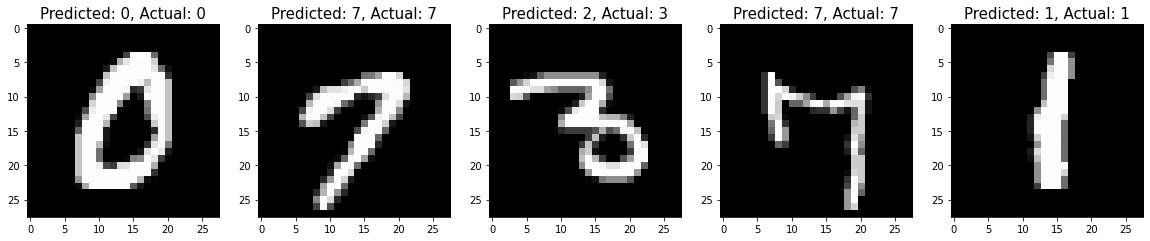

In [ ]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(ytest, log_pred):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(Xtest[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title("Predicted: {}, Actual: {}".format(log_pred[badIndex], ytest[badIndex]), fontsize = 15)

### **Supervised Learning Questions**


Develop a machine learning model using regression methods to develop an equation for house prices. Use pd.dummies() to convert categorical data into numerical data. Which model performed the best? Which model performed the worst? Which model gave the best answer relative to its runtime? Dont forget to prune your data to get the best possible model.

In [ ]:
# Just execute this cell
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fulldf = pd.read_csv('https://gitlab.com/lambpati/cs4499/-/raw/main/Houses')
fulldf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Train a Logistic Regression model on the MNIST dataset via the directions below:

While labelling all 70k images would be very time-consuming, labelling a small subset is not. A supervised model can be trained on that small subset. This is called "semi-supervised learning".<br/>
Take 150 random images from the 70k image dataset and use their labels to train a Logistic Regression model. Test it on the full dataset and report the accuracy.  

In [ ]:
# Just execute this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Download MNIST digitsclicktch_openml
mnist = fetch_openml('mnist_784',version=1)

X, y = mnist['data'].values, mnist['target'].values

mnist['data'].shape

(70000, 784)

## **Unsupervised Learning**

### **Dimensionality Reduction**

### **Pattern Search**

### **Clustering**

# **Reinforcement Learning**

# **Ensemble Methods** 